<b style="font-size:30px">BrisT1D Blood Glucose Prediction Competition</b></br>
<t style="font-size:24px">Using historical blood glucose readings, insulin dosage, carbohydrate intake, and smartwatch activity data to predict future blood glucose.</t>

# Overview
Predicting blood glucose fluctuations is crucial for managing type 1 diabetes. Developing effective algorithms for this can alleviate some of the challenges faced by individuals with the condition.

# Description
## Type 1 Diabetes
Type 1 diabetes is a chronic condition in which the body no longer produces the hormone insulin and therefore cannot regulate the amount of glucose (sugar) in the bloodstream. Without careful management, this can be life-threatening and so those with the condition need to inject insulin to manage their blood glucose levels themselves. There are many different factors that impact blood glucose levels, including eating, physical activity, stress, illness, sleep, alcohol, and many more, so calculating how much insulin to give is complex. The continuous need to think about how an action may impact blood glucose levels and what to do to counteract it is a significant burden for those with type 1 diabetes.

An important part of type 1 diabetes management is working out how blood glucose levels are going to change in the future. Algorithms of varying levels of complexity have been developed that perform this prediction but the messy nature of health data and the numerous unmeasured factors mean there is a limit to how effective they can be. This competition aims to build on this work by challenging people to predict future blood glucose on a newly collected dataset.

## The Dataset
The data used in this competition is part of a newly collected dataset of real-world data collected from young adults in the UK who have type 1 diabetes. All participants used continuous glucose monitors, and insulin pumps and were given a smartwatch as part of the study to collect activity data. The complete dataset will be published after the competition for research purposes. Some more details about the study can be found in this blog post.

## Evaluation
Submissions are evaluated on Root Mean Square Error (RMSE) between the predicted blood glucose levels an hour into the future and the actual values that were then collected.

The RMSE value is calculated from the bg+1:00(future blood glucose) prediction values in the submission file against the true future blood glucose values. The RMSE values for the public and private leaderboards are calculated from unknown and non-overlapping samples from the submission file across all of the participants.

## Submission File
For each ID in the test set, you must predict a blood glucose value an hour into the future. The file should contain a header and have the following format:

```csv
id,bg+1:00
p01_0,6.3
p01_1,6.3
p01_2,6.3
etc.
```

# Dataset Description
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

## Complexities to be aware of:

this is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

### Files:
- `activities.txt` - a list of activity names that appear in the activity-X:XX columns
- `sample_submission.csv` - a sample submission file in the correct format
- `test.csv` - the test set
- `train.csv` - the training set

### Columns in the dataset
- `train.csv`
- `id` - row id consisting of participant number and a count for that participant
- `p_num` - participant number
- `time` - time of day in the format HH:MM:SS
- `bg-X:XX` - blood glucose reading in mmol/L, X:XX(H:MM) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
- `insulin-X:XX` - total insulin dose received in units in the last 5 minutes, X:XX(H:MM) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
- `carbs-X:XX` - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:MM) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
- `hr-X:XX` - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:MM) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
- `steps-X:XX` - total steps walked in the last 5 minutes, X:XX(H:MM) time in the past (e.g. steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
- `cals-X:XX` - total calories burnt in the last 5 minutes, X:XX(H:MM) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
- `activity-X:XX` - self-declared activity performed in the last 5 minutes, X:XX(H:MM) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
- `bg+1:00` - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

# Data cleaning and dimensionality reduction

## a) loading `train.csv` from dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import json
from datetime import datetime


In [2]:

df = pd.read_csv("dataset/train.csv")


/tmp/ipykernel_7074/1032061791.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset/train.csv")


## b) Extract only the time from the time column

In [3]:
df_edited = df.copy()

df_edited["time"] = pd.to_datetime(df["time"], format='%H:%M:%S')
df_edited["time"] = df_edited["time"].dt.time

df_edited.head()


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


## c) Computing the day for each person 

- The day must be known, otherwhise the data would be cyclic (some other approach can be taken, such as converting the time into a polar/cyclic variable such as an angle)
- The ID contains the patient identifier and the id of the row: `p{patient_id}{measurement_id}`
- We need to account for when noon is passed (finding the moment when the `hour[i-1] > hour[i]` (past noon); then adding one day)
- The competition opened on 18th September 2024, so we're gona take that as starting date (due to lack of any definition)

In [4]:

# Calculate day column based on hours and patient ID
df_day = df_edited.groupby('p_num')['time'].apply(lambda x: (x < x.shift(1)).cumsum())

# Select third column from df_day
df_edited["day"] = df_day.reset_index(level=0, drop=True)

# Convert time to datetime by combining with base date and adding days
df_edited['date'] = pd.to_datetime('2000-09-18') + pd.to_timedelta(df_edited['day'], unit='D')
df_edited['datetime'] = pd.to_datetime(df_edited['date'].astype(str) + ' ' + df_edited['time'].astype(str))
df_edited["time"] = df_edited["datetime"]
df_edited = df_edited.drop(columns=['date', 'datetime', "day"])

## d)  Map the p_num column to numeric values

In [5]:

# Create a dictionary to map patient strings to numeric IDs
patient_map = {}
counter = 0

def convert_patient_id(p_num):
    # If patient not seen before, assign new numeric ID
    if p_num not in patient_map:
        global counter
        patient_map[p_num] = counter
        counter += 1
    return patient_map[p_num]

# Convert p_num column to numeric IDs
df_edited['p_num'] = df_edited['p_num'].apply(lambda x: convert_patient_id(x))

In [6]:
def convert_measure_id(m_id):
    return int(str(m_id).split("_")[-1])

df_edited['m_num'] = df_edited['id'].apply(lambda x: convert_measure_id(x))

## e) Values columns transformations

We'll call *"value columns"* all that columns that can be grouped by a concept:
- `bg-H:mm` 
- `insulin-H:mm` 
- `carbs-H:mm` 
- `hr-H:mm` 
- `steps-H:mm` 
- `cals-H:mm`
- `activity-H:mm`




### e1) Interpolate for missing values in the blood-glucose series:
- There are missing values in the blood glucose series, which is most likely due to the variance in the sampling rate of most users with respect to the bg-H:mm columns "sampling rate", that is, the difference in time from column to column.
  - In the worse case, users can sample at as low a period as 15min
  - Measurements between columns in the blood-glucose columns are always 5min
- This can be solved by interpolating the values, along `axis=1`

1. Find blood glucose columns

In [7]:
listColumns = list(filter(lambda x: "bg-" in x, df_edited.columns))

2. Extract the background glucose onto a new df for easier debugging in the notebook

In [8]:
df_bg = df_edited.copy()
df_bg_cols = df_bg[listColumns]

df_bg_cols.columns = np.linspace(0, len(df_bg_cols.columns), len(df_bg_cols.columns))

df_bg_cols.interpolate(method='linear', limit_direction='both', axis=1, inplace=True)

df_bg_cols.columns = listColumns


/tmp/ipykernel_7074/1839504748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bg_cols.interpolate(method='linear', limit_direction='both', axis=1, inplace=True)


In [9]:
df_bg_cols.head()

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00
0,9.6,9.6,9.6,9.633333,9.666667,9.7,9.533333,9.366667,9.2,9.033333,...,17.5,17.433333,17.366667,17.3,16.933333,16.566667,16.2,15.833333,15.466667,15.1
1,9.7,9.7,9.7,9.533333,9.366667,9.2,9.033333,8.866667,8.7,8.600000,...,17.3,16.933333,16.566667,16.2,15.833333,15.466667,15.1,14.866667,14.633333,14.4
2,9.2,9.2,9.2,9.033333,8.866667,8.7,8.600000,8.500000,8.4,8.300000,...,16.2,15.833333,15.466667,15.1,14.866667,14.633333,14.4,14.233333,14.066667,13.9
3,8.7,8.7,8.7,8.600000,8.500000,8.4,8.300000,8.200000,8.1,8.166667,...,15.1,14.866667,14.633333,14.4,14.233333,14.066667,13.9,13.866667,13.833333,13.8
4,8.4,8.4,8.4,8.300000,8.200000,8.1,8.166667,8.233333,8.3,8.733333,...,14.4,14.233333,14.066667,13.9,13.866667,13.833333,13.8,13.666667,13.533333,13.4


In [10]:
df_edited[listColumns] = df_bg_cols
df_edited.head()[listColumns]

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00
0,9.6,9.6,9.6,9.633333,9.666667,9.7,9.533333,9.366667,9.2,9.033333,...,17.5,17.433333,17.366667,17.3,16.933333,16.566667,16.2,15.833333,15.466667,15.1
1,9.7,9.7,9.7,9.533333,9.366667,9.2,9.033333,8.866667,8.7,8.600000,...,17.3,16.933333,16.566667,16.2,15.833333,15.466667,15.1,14.866667,14.633333,14.4
2,9.2,9.2,9.2,9.033333,8.866667,8.7,8.600000,8.500000,8.4,8.300000,...,16.2,15.833333,15.466667,15.1,14.866667,14.633333,14.4,14.233333,14.066667,13.9
3,8.7,8.7,8.7,8.600000,8.500000,8.4,8.300000,8.200000,8.1,8.166667,...,15.1,14.866667,14.633333,14.4,14.233333,14.066667,13.9,13.866667,13.833333,13.8
4,8.4,8.4,8.4,8.300000,8.200000,8.1,8.166667,8.233333,8.3,8.733333,...,14.4,14.233333,14.066667,13.9,13.866667,13.833333,13.8,13.666667,13.533333,13.4


### e2) From the **INSULIN** columns:
- These values are pretty much continuous
- By looking at the dataset, we can see the sampling discrepancies are already resolved in this section
- Although the pump appears to sample at a different rate, the intermediate values are present
- The only modification to be done here is removing possible missing values and replacing them by 0, just not to alter the measurements, we'll assume the pump is not providing insulin at those moments

In [11]:
listColumns = list(filter(lambda x: "insulin-" in x, df_edited.columns))

In [12]:
df_edited[listColumns] = df_edited[listColumns].fillna(0)

### e3) For the **CARBS**, we'll do a simmilar thing to the insuline, but adding instead of calculating the mean.

- The carbs operate in the same principle as the insulin.
- If there is no carb consumption logged, we will assume the participant hasn't eaten anything in that period

>The carbs values are discrete, data filtering will be explored if necessary

In [13]:
listColumns = list(filter(lambda x: "carbs-" in x, df_edited.columns))

In [14]:
df_edited[listColumns] = df_edited[listColumns].fillna(0)

### e4) **HEART-RATE** columns
- The heart rate columns have a lot of missing values
- The resting heart rate for a diabetic is a bit higher than for a normal person, around 70-90 bpm
- We will have to fill the missing values with a heartrate like that

In [15]:
listColumns = list(filter(lambda x: "hr-" in x, df_edited.columns))

1. Compute the mean

In [16]:
av_hr = df_edited[listColumns].mean().mean()
av_hr = float(av_hr)
av_hr

79.31482801424396

2. Replace the missing values with the mean

In [17]:
df_edited[listColumns] = df_edited[listColumns].fillna(av_hr)

### e5) **STEPS** data
- Steps are measured by the smartwatch, just like the estimated calory consumption (following point)
- This leads to thinking the steps are already taken into account for the consumption calculation
- Steps data can be dropped

In [18]:
listColumns = list(filter(lambda x: "steps-" in x, df_edited.columns))
df_edited.drop(listColumns, axis=1, inplace=True)

In [19]:
print(list(df_edited.columns))

['id', 'p_num', 'time', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40', 'bg-5:35', 'bg-5:30', 'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10', 'bg-5:05', 'bg-5:00', 'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40', 'bg-4:35', 'bg-4:30', 'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10', 'bg-4:05', 'bg-4:00', 'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40', 'bg-3:35', 'bg-3:30', 'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10', 'bg-3:05', 'bg-3:00', 'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40', 'bg-2:35', 'bg-2:30', 'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10', 'bg-2:05', 'bg-2:00', 'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40', 'bg-1:35', 'bg-1:30', 'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10', 'bg-1:05', 'bg-1:00', 'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40', 'bg-0:35', 'bg-0:30', 'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10', 'bg-0:05', 'bg-0:00', 'insulin-5:55', 'insulin-5:50', 'insulin-5:45', 'insulin-5:40', 'insulin-5:35', 'insulin-5:30', 'insulin-5:25', 'insulin-5:20', 'insulin-5:15', 'insulin-5:10', 'insulin-5:05', 'insulin

### e6) **CALORIES**, columns
- Lot of missing values
- We assume that, if there are no values, no calory consumption was made

In [20]:
listColumns = list(filter(lambda x: "cals-" in x, df_edited.columns))

In [21]:
df_edited[listColumns] = df_edited[listColumns].fillna(0.0)

In [22]:
df_edited[sorted(filter(lambda x: "cals" in x, df_edited.columns))].head(550)

,cals-0:00,cals-0:05,cals-0:10,cals-0:15,cals-0:20,cals-0:25,cals-0:30,cals-0:35,cals-0:40,cals-0:45,...,cals-5:10,cals-5:15,cals-5:20,cals-5:25,cals-5:30,cals-5:35,cals-5:40,cals-5:45,cals-5:50,cals-5:55
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,...,6.64,4.80,5.20,5.00,5.20,5.10,7.70,6.25,5.10,8.28
546,4.8,4.9,4.9,4.8,4.8,4.8,4.8,4.8,4.8,4.8,...,5.10,5.20,6.54,6.64,4.80,5.20,5.00,5.20,5.10,7.70
547,4.9,4.8,4.9,4.8,4.9,4.9,4.8,4.8,4.8,4.8,...,11.65,10.00,6.55,5.10,5.20,6.54,6.64,4.80,5.20,5.00
548,4.8,4.8,4.8,4.9,4.8,4.9,4.8,4.9,4.9,4.8,...,4.90,10.39,14.06,11.65,10.00,6.55,5.10,5.20,6.54,6.64


<Axes: >

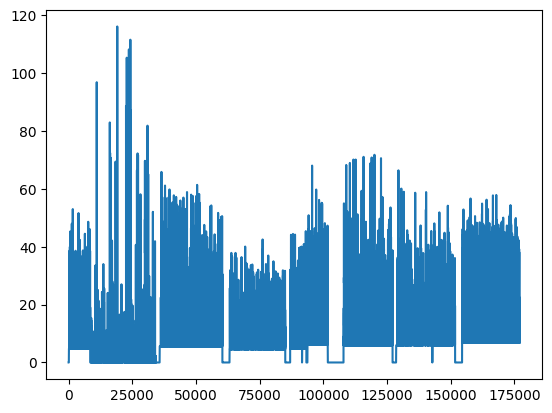

In [23]:
df_edited["cals-0:00"].plot()

## f) Accounting for the **activities**

- Make a dictionary for all the available activities: The objective here is combining the activities into a single column. For that:
  - We'll estimate a calory consumption for each present activity
  - We will make a column for each of those activities, containing a $1$ if the activity is present for the moment of the reading, ore a $0$ if not
  - Multiply each column by its activity's caloric consumption
  - Sum the activity columns and the calory column to obtain a global calory consumption for each period in time

### f1) Getting a list of all the present activities

Unique activities = dict_keys(['Walk', 'Run', 'Walking', 'Sport', 'Outdoor Bike', 'Swim', 'Aerobic Workout', 'Hike', 'Dancing', 'HIIT', 'Workout', 'Running', 'Yoga', 'Indoor climbing', 'Zumba', 'Swimming', 'Bike', 'Weights', 'Strength training', 'Tennis', 'Spinning', 'Stairclimber'])


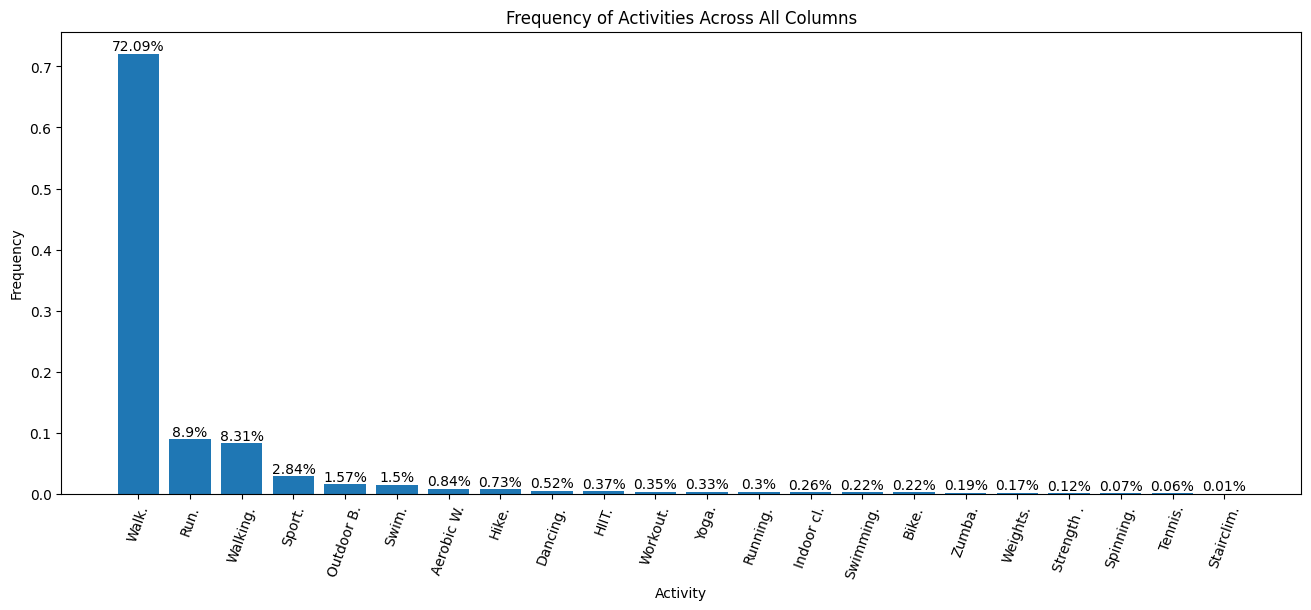

In [24]:
# Get the columns for the activities
activity_cols = [col for col in df.columns if 'activity' in col.lower()]
activity_df = df_edited[activity_cols]

# Calculate frequencies for each activity across all columns
activity_frequencies = {}
for col in activity_df.columns:
    value_counts = activity_df[col].value_counts()
    for value, count in value_counts.items():
        if value in activity_frequencies:
            activity_frequencies[value] += count
        else:
            activity_frequencies[value] = count

print(f"Unique activities = {activity_frequencies.keys()}")

# save activities to json for later processing
if not os.path.exists('configs'):
    os.makedirs("configs")
with open('configs/activities_freq.json', 'w') as f:
    f.write(json.dumps(activity_frequencies))

totalActivityEntries = sum(activity_frequencies.values())
for activity, frequency in activity_frequencies.items():
    activity_frequencies[activity] = frequency / totalActivityEntries

# Convert to sorted dictionary for better readability
sorted_frequencies = dict(sorted(activity_frequencies.items(), key=lambda x: x[1], reverse=True))

# Print frequencies
plt.figure(figsize=(16, 6))
bars = plt.bar([f"{name[:9]}." for name in sorted_frequencies.keys()], sorted_frequencies.values())
plt.ylabel("Frequency")
plt.xlabel("Activity")
plt.xticks(rotation=70)
plt.title("Frequency of Activities Across All Columns")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{round(float(height)*100, 2)}%',
             ha='center', va='bottom')

plt.show()


### f2) Now that we have a dictionary of all present sports, we can associate a calory consumption per period to every exercice.
- The data for ellaborating this dictionary has been taken from [health.harvard.edu](https://www.health.harvard.edu/diet-and-weight-loss/calories-burned-in-30-minutes-for-people-of-three-different-weights)
- The data there is per 30-minute exercice so the values on that table will be divided by 2 since our periods are 1-minute long
- The weight considered will be the closest to the average weight in the population $155lb = 70kg \approx 65kg(average)$

> Here is a table of what exercices have been considered equivalents between the dataset and the Harvard table:
> | Our dataset | Harvard Table | Value (kCal/1min) |
> |---|---|---|
> | Walk | Walking: 4 mph (15 min/mi) | 5.83 |
> | Walking | Walking: 4 mph (15 min/mi) | 5.83 |
> | Run | Running: 6 mph (10 min/mile) | 12.0 |
> | Running | Running: 6 mph (10 min/mile) | 12.0 |
> | Sport | A common value in the "Sports" table | 8 |
> | Bike | Bicycling: BMX or mountain | 12.0 |
> | Outdoor Bike | Bicycling: BMX or mountain | 12.0 |
> | Swim | Swimming: general | 7.2 |
> | Swimming | Swimming: general | 7.2 |
> | Aerobic Workout | Aerobics: low impact | 99 |
> | Hike | Hiking: cross-country | 7.2 |
> | HIIT | Aerobics, Step: high impact | 12.0 |
> | Workout | Weight Lifting: general | 3.6 |
> | Weights | Weight Lifting: general | 3.6 |
> | Strength training | Weight Lifting: general | 3.6 |
> | Yoga | Stretching, Hatha Yoga | 2.4 |
> | Indoor climbing | Rock Climbing: ascending | 9.333 |
> | Zumba | Dancing: Fast, ballet, twist | 7.2 |
> | Tennis | Tennis: General | 8.4 |
> | Spinning | Bicycling, Stationary: moderate | 8.4 |
> | StairClimbing | Stair Step Machine: general | 7.2 |
> 

Notice there are some big jumps but they are representative of data loss and missing measurements

In [25]:
listColumns = list(filter(lambda x: "activity-" in x, df_edited.columns))

In [26]:
caloryConsumption_perActivity: dict = json.loads(open("configs/activities_calory_consumption.json", "r").read())
# replace the keys in those columns with their dictionary value
df_edited[listColumns] = df_edited[listColumns].replace(caloryConsumption_perActivity).astype(float).fillna(0.0) * 5

/tmp/ipykernel_7074/1411259248.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_edited[listColumns] = df_edited[listColumns].replace(caloryConsumption_perActivity).astype(float).fillna(0.0) * 5


<Axes: >

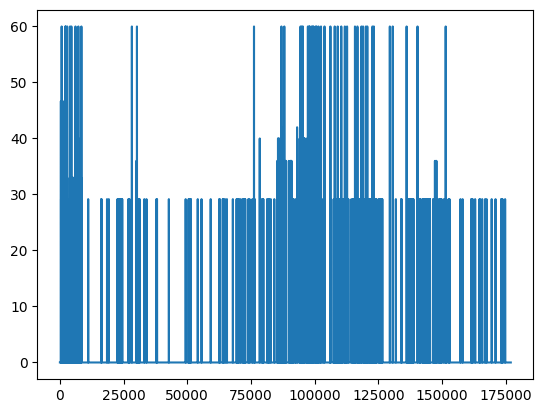

In [27]:
df_edited[listColumns[0]].plot()

In [28]:
df_edited[listColumns].head(505)

,activity-5:55,activity-5:50,activity-5:45,activity-5:40,activity-5:35,activity-5:30,activity-5:25,activity-5:20,activity-5:15,activity-5:10,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.166667,29.166667,29.166667,29.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.000000,0.000000,0.000000,29.166667,29.166667,29.166667,29.166667,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df_edited[sorted(filter(lambda x: "cals-" in x, df_edited.columns))].head(505)

,cals-0:00,cals-0:05,cals-0:10,cals-0:15,cals-0:20,cals-0:25,cals-0:30,cals-0:35,cals-0:40,cals-0:45,...,cals-5:10,cals-5:15,cals-5:20,cals-5:25,cals-5:30,cals-5:35,cals-5:40,cals-5:45,cals-5:50,cals-5:55
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,13.57,19.06,17.34,18.96,19.25,17.81,15.31,11.84,15.60,7.91,...,7.42,8.95,7.51,8.37,10.11,10.60,5.30,9.43,6.74,6.74
501,10.21,10.88,15.39,13.57,19.06,17.34,18.96,19.25,17.81,15.31,...,5.49,7.80,11.46,7.42,8.95,7.51,8.37,10.11,10.60,5.30
502,15.01,13.30,7.61,10.21,10.88,15.39,13.57,19.06,17.34,18.96,...,6.45,7.79,6.54,5.49,7.80,11.46,7.42,8.95,7.51,8.37
503,11.36,7.23,14.15,15.01,13.30,7.61,10.21,10.88,15.39,13.57,...,14.44,8.19,5.10,6.45,7.79,6.54,5.49,7.80,11.46,7.42


- Finally, add the activity columns to the calory one, since they are both the same concept

In [30]:
listColumns_cals = list(filter(lambda x: "cals-" in x, df_edited.columns))
pair_cols_sum = [[listColumns_cals[i], listColumns[i]] for i in range(len(listColumns))]

print(pair_cols_sum)

[['cals-5:55', 'activity-5:55'], ['cals-5:50', 'activity-5:50'], ['cals-5:45', 'activity-5:45'], ['cals-5:40', 'activity-5:40'], ['cals-5:35', 'activity-5:35'], ['cals-5:30', 'activity-5:30'], ['cals-5:25', 'activity-5:25'], ['cals-5:20', 'activity-5:20'], ['cals-5:15', 'activity-5:15'], ['cals-5:10', 'activity-5:10'], ['cals-5:05', 'activity-5:05'], ['cals-5:00', 'activity-5:00'], ['cals-4:55', 'activity-4:55'], ['cals-4:50', 'activity-4:50'], ['cals-4:45', 'activity-4:45'], ['cals-4:40', 'activity-4:40'], ['cals-4:35', 'activity-4:35'], ['cals-4:30', 'activity-4:30'], ['cals-4:25', 'activity-4:25'], ['cals-4:20', 'activity-4:20'], ['cals-4:15', 'activity-4:15'], ['cals-4:10', 'activity-4:10'], ['cals-4:05', 'activity-4:05'], ['cals-4:00', 'activity-4:00'], ['cals-3:55', 'activity-3:55'], ['cals-3:50', 'activity-3:50'], ['cals-3:45', 'activity-3:45'], ['cals-3:40', 'activity-3:40'], ['cals-3:35', 'activity-3:35'], ['cals-3:30', 'activity-3:30'], ['cals-3:25', 'activity-3:25'], ['cals-

In [31]:
df_edited[pair_cols_sum[0][0]] + df_edited[pair_cols_sum[0][1]]

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
177019    6.75
177020    6.75
177021    6.75
177022    6.75
177023    6.75
Length: 177024, dtype: float64

In [32]:
for pair in pair_cols_sum:
    df_edited[pair[0]] = df_edited[pair[0]] + df_edited[pair[1]] 
    df_edited.drop(columns=pair[1], inplace=True)

<Axes: >

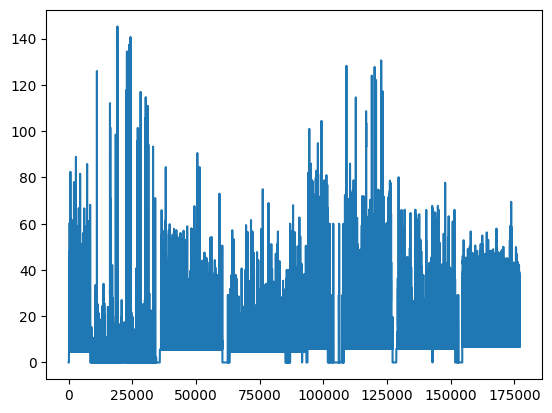

In [33]:
df_edited[pair_cols_sum[0][0]].plot()

## f) Extend validation columns 

In [34]:
df_more_cols = df_edited.copy()
df_more_cols['time'] = pd.to_datetime(df_more_cols['time'])

future_hours = [2, 3, 4]
future_cols = [f"bg+{hour}:00" for hour in future_hours]

def add_future_columns(group):
    for hour in future_hours:
        print(hour)
        col = f"bg+{hour}:00"
        # Use group-specific logic
        group[col] = group['time'].apply(
            lambda ts: group.loc[
                group['time'] >= ts + pd.Timedelta(hours=hour), 'bg-0:00'
            ].iloc[0] if not group.loc[group['time'] >= ts + pd.Timedelta(hours=hour)].empty else np.nan
        )
    return group

df_more_cols = df_more_cols.groupby('p_num').apply(lambda g: add_future_columns(g))
    


2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4


/tmp/ipykernel_7074/826717472.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_more_cols = df_more_cols.groupby('p_num').apply(lambda g: add_future_columns(g))


In [36]:
df_more_cols.head()[future_cols]

bg+2:00  bg+3:00  bg+4:00
p_num                             
0     0     12.7     17.1     14.3
      1     11.4     17.9     12.6
      2     11.9     17.4     11.2
      3     15.1     16.1      8.6
      4     17.1     14.3      6.6

In [39]:
df_cleaned = df_more_cols.dropna(subset=future_cols)

In [41]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [42]:
df_cleaned.columns

Index(['id', 'p_num', 'time', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40',
       'bg-5:35', 'bg-5:30', 'bg-5:25',
       ...
       'cals-0:20', 'cals-0:15', 'cals-0:10', 'cals-0:05', 'cals-0:00',
       'bg+1:00', 'm_num', 'bg+2:00', 'bg+3:00', 'bg+4:00'],
      dtype='object', length=368)

### g) Save the processed dataset to csv

In [44]:
df_cleaned.head(550) #to show first 5 rows of the dataset

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,m_num,bg+2:00,bg+3:00,bg+4:00
0,p01_0,0,2000-09-18 06:10:00,9.6,9.6,9.600000,9.633333,9.666667,9.700000,9.533333,...,0.0,0.0,0.0,0.0,0.0,13.4,0,12.7,17.1,14.3
1,p01_1,0,2000-09-18 06:25:00,9.7,9.7,9.700000,9.533333,9.366667,9.200000,9.033333,...,0.0,0.0,0.0,0.0,0.0,12.8,1,11.4,17.9,12.6
2,p01_2,0,2000-09-18 06:40:00,9.2,9.2,9.200000,9.033333,8.866667,8.700000,8.600000,...,0.0,0.0,0.0,0.0,0.0,15.5,2,11.9,17.4,11.2
3,p01_3,0,2000-09-18 06:55:00,8.7,8.7,8.700000,8.600000,8.500000,8.400000,8.300000,...,0.0,0.0,0.0,0.0,0.0,14.8,3,15.1,16.1,8.6
4,p01_4,0,2000-09-18 07:10:00,8.4,8.4,8.400000,8.300000,8.200000,8.100000,8.166667,...,0.0,0.0,0.0,0.0,0.0,12.7,4,17.1,14.3,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,p01_545,0,2000-09-24 05:15:00,14.1,14.1,13.600000,13.100000,12.600000,11.966667,11.333333,...,4.8,4.8,4.8,4.8,4.8,4.4,545,4.4,9.6,8.4
546,p01_546,0,2000-09-24 05:30:00,12.6,12.6,11.966667,11.333333,10.700000,10.033333,9.366667,...,4.8,4.8,4.9,4.9,4.8,4.4,546,4.8,10.2,7.5
547,p01_547,0,2000-09-24 05:45:00,10.7,10.7,10.033333,9.366667,8.700000,8.500000,8.300000,...,4.9,4.8,4.9,4.8,4.9,4.4,547,6.2,9.8,7.3
548,p01_548,0,2000-09-24 06:00:00,8.7,8.7,8.500000,8.300000,8.100000,7.933333,7.766667,...,4.8,4.9,4.8,4.8,4.8,4.3,548,8.2,9.2,7.9


In [48]:
orderedCols = ["id", "m_num", "p_num", "time"]
orderedCols.extend(list(filter(lambda x: "bg-" in x, df_cleaned.columns)))
orderedCols.extend(list(filter(lambda x: "insulin-" in x, df_cleaned.columns)))
orderedCols.extend(list(filter(lambda x: "carbs-" in x, df_cleaned.columns)))
orderedCols.extend(list(filter(lambda x: "cals-" in x, df_cleaned.columns)))
orderedCols.extend(list(filter(lambda x: "hr-" in x, df_cleaned.columns)))
orderedCols.extend(list(filter(lambda x: "bg+" in x, df_cleaned.columns)))
print(orderedCols)


['id', 'm_num', 'p_num', 'time', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40', 'bg-5:35', 'bg-5:30', 'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10', 'bg-5:05', 'bg-5:00', 'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40', 'bg-4:35', 'bg-4:30', 'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10', 'bg-4:05', 'bg-4:00', 'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40', 'bg-3:35', 'bg-3:30', 'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10', 'bg-3:05', 'bg-3:00', 'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40', 'bg-2:35', 'bg-2:30', 'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10', 'bg-2:05', 'bg-2:00', 'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40', 'bg-1:35', 'bg-1:30', 'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10', 'bg-1:05', 'bg-1:00', 'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40', 'bg-0:35', 'bg-0:30', 'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10', 'bg-0:05', 'bg-0:00', 'insulin-5:55', 'insulin-5:50', 'insulin-5:45', 'insulin-5:40', 'insulin-5:35', 'insulin-5:30', 'insulin-5:25', 'insulin-5:20', 'insulin-5:15', 'insulin-5:10', 'insulin-5:05',

In [49]:

df_cleaned = df_cleaned[orderedCols]
df_cleaned.head(5) #to show first 5 rows of the dataset

,id,m_num,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,...,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,bg+1:00,bg+2:00,bg+3:00,bg+4:00
0,p01_0,0,0,2000-09-18 06:10:00,9.6,9.6,9.6,9.633333,9.666667,9.7,...,79.314828,79.314828,79.314828,79.314828,79.314828,79.314828,13.4,12.7,17.1,14.3
1,p01_1,1,0,2000-09-18 06:25:00,9.7,9.7,9.7,9.533333,9.366667,9.2,...,79.314828,79.314828,79.314828,79.314828,79.314828,79.314828,12.8,11.4,17.9,12.6
2,p01_2,2,0,2000-09-18 06:40:00,9.2,9.2,9.2,9.033333,8.866667,8.7,...,79.314828,79.314828,79.314828,79.314828,79.314828,79.314828,15.5,11.9,17.4,11.2
3,p01_3,3,0,2000-09-18 06:55:00,8.7,8.7,8.7,8.600000,8.500000,8.4,...,79.314828,79.314828,79.314828,79.314828,79.314828,79.314828,14.8,15.1,16.1,8.6
4,p01_4,4,0,2000-09-18 07:10:00,8.4,8.4,8.4,8.300000,8.200000,8.1,...,79.314828,79.314828,79.314828,79.314828,79.314828,79.314828,12.7,17.1,14.3,6.6


In [50]:
if not os.path.exists("dataset/processed"):
    os.makedirs("dataset/processed")
df_cleaned.to_csv("dataset/processed/train.csv", index=False)

### Save on csv per patient

In [171]:
perPatient = df_cleaned.groupby(by="p_num")

if not os.path.exists("dataset/processed/patients"):
    os.makedirs("dataset/processed/patients")

for patient in perPatient:
    patient[1].\
        to_csv("dataset/processed/patients/patient" + str(patient[0]) + ".csv", index=False)